# Settings

In [1]:
import librosa
import numpy as np
import pandas as pd
import os
import soundfile as sf
import preprocessing
from collections import Counter
import matplotlib.pyplot as plt
import helper

In [2]:
df = pd.read_csv("audio_features_dataset_prep.csv")

In [3]:
file_path = 'C://Users//mario//OneDrive//Desktop//Dataset - senza_duplicati//Non-Target//Right whale//RightWhale.wav'

In [4]:
audio_file ='C://Users//mario//OneDrive//Desktop//Dataset - senza_duplicati//Target//Cargo//Cargo-Ship-at-20-knts.wav'

In [5]:
normalized_ds = "C://Users//mario//OneDrive//Desktop//Dataset - normalizzato//"

In [6]:
amplitudes = df['Ampiezza del segnale'].tolist()

In [7]:
def plot_distribution_boxplot(values, title):
    plt.figure(figsize=(10, 6))
    plt.plot(values)
    plt.title(title)
    plt.xlabel('Indice')
    plt.ylabel('Valore')
    plt.grid(True)
    plt.show()

# 1. Normalizzazione dei segnali digitali

Per lo studio dei segnali audio occore effettuare alcune modifiche. In particolare, una delle prime fasi del preprocessing, consiste nel normalizzare, ovvero portare l'ampiezza del segnale audio tra -1 e 1.

per normalizzare gli audio all'interno del dataset è stato utilizzato il metodo normalize() di librosa. Nell'esempio seguente si nota che l'ampiezza del segnale audio resta compresa tra -1 e 1. Nel nostro, le ampiezze sono già in valore assoluto, quindi dopo la normalizzazione i valori delle ampiezze vanno da 0 a 1.

In [8]:
x, sr = librosa.load(audio_file, sr=None)

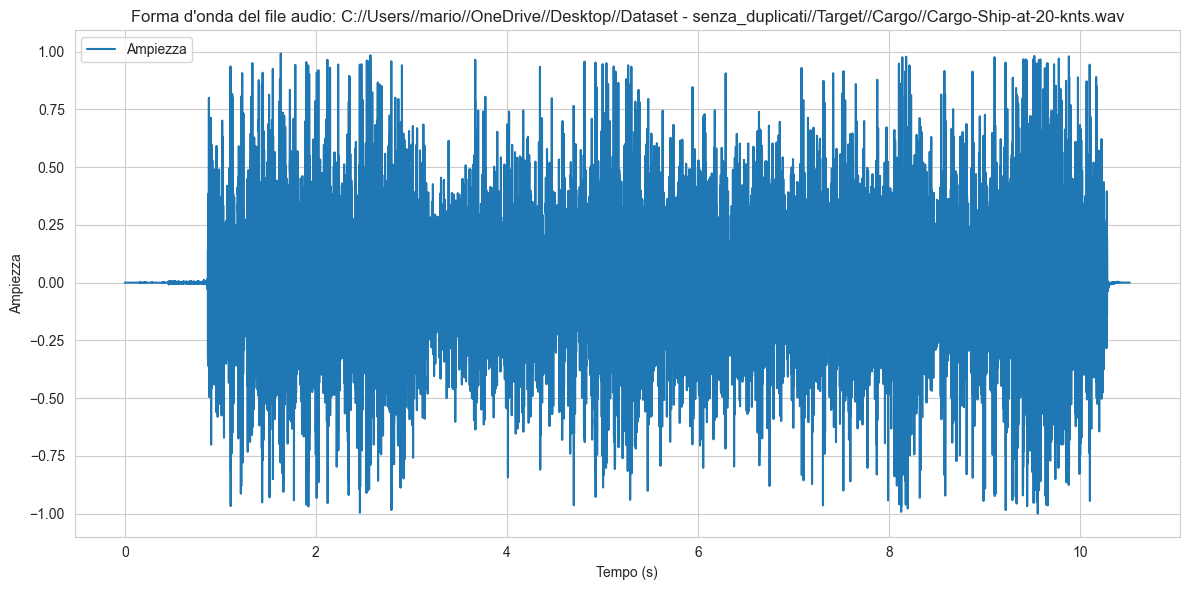

In [9]:
helper.plot_audio_waveform(audio_file)

Se abbiamo normalizzato correttamente, i valori saranno tutti compresi tra -1 e 1 e il valore massimo assoluto del segnale sarà molto vicino a 1 (come mostrato nel grafico seguente).

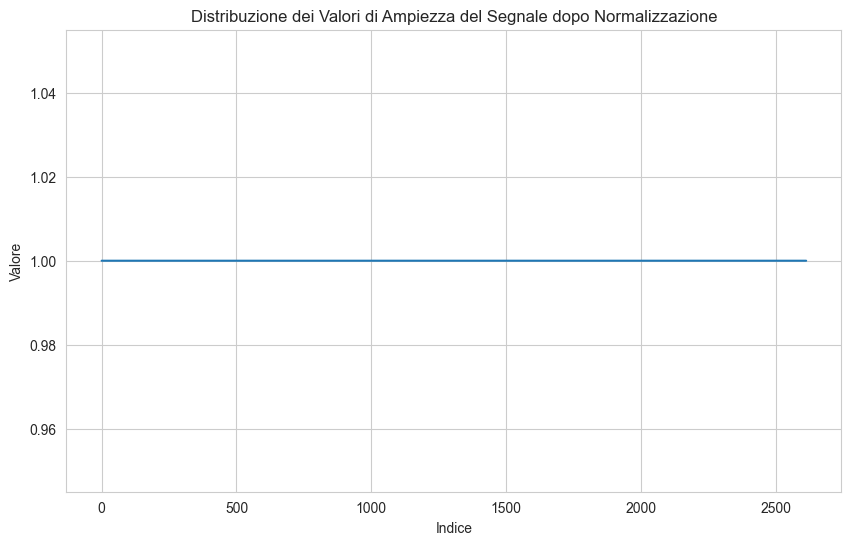

In [10]:
plot_distribution_boxplot(amplitudes, 'Distribuzione dei Valori di Ampiezza del Segnale dopo Normalizzazione')

## 1.1 Bit Depth & Canali

Successivamente i file sono stati portati a 16 bit depth e in monocanale

Tutti i file audio son stati convertiti in file .wav

In [11]:
def convert_to_wav_16bit(file_path):
    # Carica il file audio utilizzando librosa in mono
    y, sr = librosa.load(file_path, sr=None, mono=True)

    # Normalizza il segnale audio
    y = librosa.util.normalize(y)

    # Converti y in formato 16-bit
    y_16bit = np.int16(y * 32767)

    # Crea un nuovo percorso di file con estensione .wav
    new_file_path = os.path.splitext(file_path)[0] + '.wav'

    # Scrivi l'audio convertito come 16-bit con soundfile
    sf.write(new_file_path, y_16bit, sr, subtype='PCM_16')

    return new_file_path

con librosa i file sono stati caricati in monocanale a 16 bit depth. Di seguito un esempio su un file audio

In [12]:
y, sr = librosa.load(file_path, sr=None, mono=True)
y_16bit = np.int16(y * 32767)

spettrogramma del file audio

In [13]:
duration = librosa.get_duration(y=y, sr=sr)

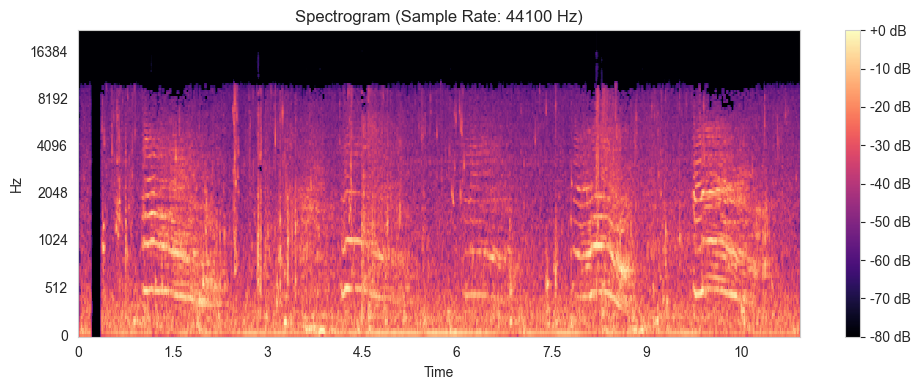

In [14]:
helper.create_spectrogram(file_path, sr)

In [15]:
y.shape, sr, duration

((503808,), 44100, 11.42421768707483)

In [16]:
sr * duration

503808.0

questi sono i risultati in seguito alla prima fase di preprocessing

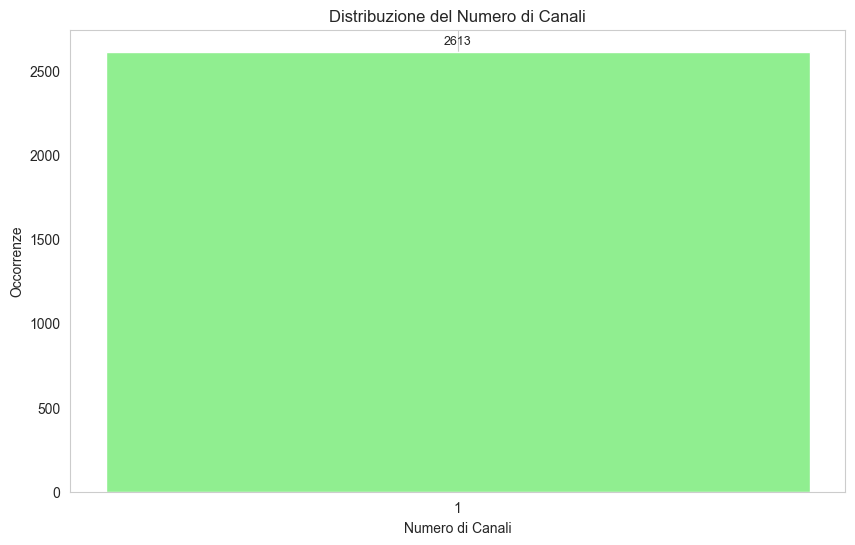

In [17]:
helper.prep_plot_channel_distribution(df)


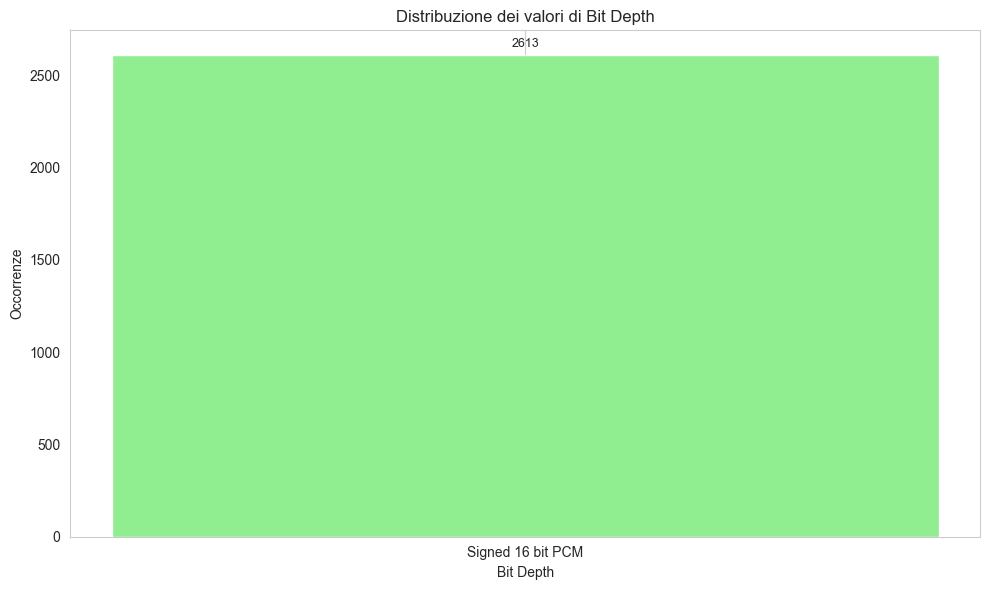

In [18]:
helper.prep_plot_bit_depth_distribution(df)

## 1.2 Resampling

Per l'analisi di suoni ambientali è stato scelto di ricampionare a 44.1kHz, in modo da garantire maggiore qualità, riuscendo così ad analizzare anche i dettagli sonori.

In [19]:
new_sr = 96000

In [20]:
y_res, new_sr = librosa.load(file_path, sr=new_sr, mono=True)

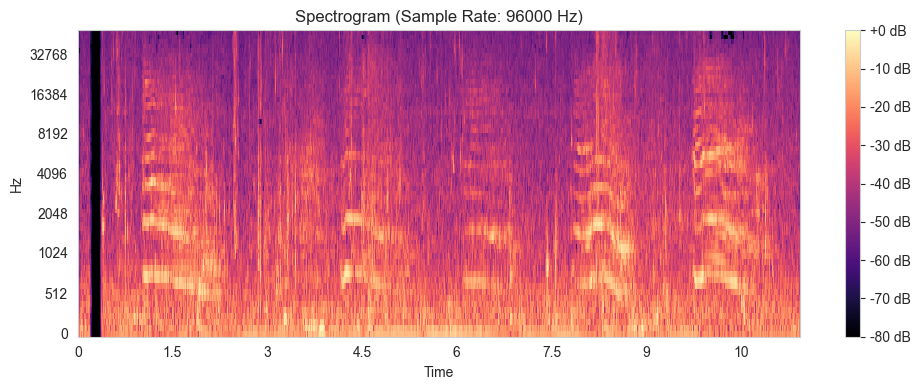

In [21]:
file_path_resampled = librosa.resample(y_res, orig_sr=sr, target_sr= new_sr)
helper.create_spectrogram_low_sr(file_path, new_sr)

In [22]:
duration = librosa.get_duration(y=y_res, sr=new_sr)
y_res.shape, new_sr, duration

((1096725,), 96000, 11.42421875)